
<div style="text-align:center;">
<img src="https://apollohealthlib.blob.core.windows.net/health-library/2022/05/Monkeypox.jpeg" width="600px">
</div>

<a id='section-0'></a>

<h1 style="color:#ff1a75; text-align:center;">Monkeypox Dataset (Daily Updated)</h1>

<h3 style="color:#ff66ff; text-align:center;">Monkey pox cases around the world</h3>

---

<h2 style="color:#33ccff;">Table of Contents:</h2>
<ol>
    <li><a href="#section-1" style="color:#0000ff;">Summary</a></li>
    <li><a href="#section-2" style="color:#0000ff;">Importing Necessary Libraries</a></li>
    <li><a href="#section-3" style="color:#0000ff;">Data Loading and Pre-Processing</a></li>
    <li><a href="#section-4" style="color:#0000ff;">Exploratory Data Analysis</a></li>
    <ol>
        <li><a href="#section-4.1" style="color:#0000ff;">Top 10 Countries based on Confirmed Cases</a></li>
        <li><a href="#section-4.2" style="color:#0000ff;">Top 10 Countries based on Suspected Cases</a></li>
        <li><a href="#section-4.3" style="color:#0000ff;">Top 10 Countries based on Hospitalized Cases</a></li>
        <li><a href="#section-4.4" style="color:#0000ff;">Top 10 Countries based on Cases having Travel History</a></li>
        <li><a href="#section-4.5" style="color:#0000ff;">Top 10 Countries based on Cases not having Travel History</a></li>
        <li><a href="#section-4.6" style="color:#0000ff;">Confirmed MonkeyPox Cases Across The Globe</a></li>
        <li><a href="#section-4.7" style="color:#0000ff;">Suspected MonkeyPox Cases Across The Globe</a></li>
    </ol>
    <li><a href="#section-5" style="color:#0000ff;">Feature Engineering</a></li>
    <ol>
        <li><a href="#section-5.1" style="color:#0000ff;">Correlation Heatmap</a></li>
        <li><a href="#section-5.2" style="color:#0000ff;">ScatterPlot Distribution</a></li>
        <li><a href="#section-5.3" style="color:#0000ff;">PairPlot</a></li>
        <li><a href="#section-5.4" style="color:#0000ff;">Outlier Detection</a></li>
        <li><a href="#section-5.5" style="color:#0000ff;">Distribution Curves</a></li>
    </ol>
    <li><a href="#section-6" style="color:#0000ff;">Normalization</a></li>
    <ol>
        <li><a href="#section-6.1" style="color:#0000ff;">Before Vs After Scaling</a></li>
    </ol>
    <li><a href="#section-7" style="color:#0000ff;">Modelling</a></li>
    <ol>
        <li><a href="#section-7.1" style="color:#0000ff;">Linear Regression</a></li>
        <li><a href="#section-7.2" style="color:#0000ff;">Decision Tree Regressor</a></li>
        <li><a href="#section-7.3" style="color:#0000ff;">Random Forest Regressor</a></li>
        <li><a href="#section-7.4" style="color:#0000ff;">Elastic Net Regressor</a></li>
    </ol>
    <li><a href="#section-8" style="color:#0000ff;">Results</a></li>
    <li><a href="#section-99" style="color:#0000ff;">Thank You</a></li>
</ol>

---

<a id='section-1'></a>
<h1 style="color:#ff1a75;">Summary</h1>

<p style="color:#000066; font-size:16px;">MonkeyPox Cases are increasing everyday and let's hope,that Doctors can predict its pattern, symptoms and cures as early as possible before it becomes a pandemic.<br>We as Data Scientists can try predicting patterns and hope that we can find some solution using available Data.<br><br>This notebook is an aim at finding patterns through EDA.<br><br> 
<b>Try hovering over the maps to see their complete strength.</b></p>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

<a id='section-2'></a>
<h1 style="color:#ff1a75;">Importing Necessary Libraries</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [1]:
#Data Loading
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

import os

<a id='section-3'></a>
<h1 style="color:#ff1a75;">Data Loading and Pre-Processing</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [2]:
df = pd.read_csv('../input/monkeypox-dataset-daily-updated/Monkey_Pox_Cases_Worldwide.csv')

In [3]:
df.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,1185.0,0.0,5.0,2.0,7.0
1,Portugal,402.0,0.0,0.0,0.0,34.0
2,Spain,1196.0,0.0,11.0,2.0,0.0
3,United States,459.0,0.0,4.0,19.0,1.0
4,Canada,287.0,7.0,1.0,2.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             82 non-null     object 
 1   Confirmed_Cases     82 non-null     float64
 2   Suspected_Cases     82 non-null     float64
 3   Hospitalized        82 non-null     float64
 4   Travel_History_Yes  82 non-null     float64
 5   Travel_History_No   82 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.0+ KB


<p style="color:#000066; font-size:16px;">Our dataset only has 24 rows so let's see what we can find with it!!!</p>

In [5]:
df.isnull().sum()

Country               0
Confirmed_Cases       0
Suspected_Cases       0
Hospitalized          0
Travel_History_Yes    0
Travel_History_No     0
dtype: int64

<p style="color:#000066; font-size:16px;">The dataset is well maintained and all the values are filled!!!</p>

<a id='section-4'></a>
<h1 style="color:#ff1a75;">Exploratory Data Analysis</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [6]:
def top10plots(col=None):
    #Sorting the Dataset
    df_sorted = df.sort_values(by=col,ascending=False).reset_index()
    #Getting the Top10
    top10 = df_sorted[:10]
    # Plotting the Top10
    label_text = ' '.join(col.split('_'))
    labeldict = {'size':'15','weight':'3'}
    titledict = {'size':'20','weight':'3'}
    fig = px.bar(x='Country',
                 y=col,
                 data_frame=top10,
                 labels=['Country',label_text],
                 color=col,
                 color_continuous_scale='electric',
                 text_auto=True,
                 title=f'Top 10 Countries based on {label_text}')
    fig.show()

<p style="color:#000066; font-size:16px;">The function above, sorts the dataset in descending order based on the function we pass, then plots the top10 values over a bargraph</p>

<a id='section-4.1'></a>
<h3 style="color:#ff1a75;">Top 10 Countries based on Confirmed Cases</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [7]:
top10plots(col='Confirmed_Cases')

<p style="color:#000066; font-size:16px;">So we can see that the most affected countries are from <b>EUROPE</b> and <b>North America</b></p>

<a id='section-4.2'></a>
<h3 style="color:#ff1a75;">Top 10 Countries based on Suspected Cases</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [8]:
top10plots(col='Suspected_Cases')

<p style="color:#000066; font-size:16px;">The same pattern can be seen in the Suspected Cases, <b>EUROPE</b> and <b>North America</b> have the highest affected countries</p>

<a id='section-4.3'></a>
<h3 style="color:#ff1a75;">Top 10 Countries based on Hospitalized Cases</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [9]:
top10plots(col='Hospitalized')

<p style="color:#000066; font-size:16px;">Although the highest number of Confirmed Cases were from <b>England</b>, yet the number of Hospitalized people are very less!!!</p>

<a id='section-4.4'></a>
<h3 style="color:#ff1a75;">Top 10 Countries based on Cases having Travel History</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [10]:
top10plots(col='Travel_History_Yes')

<p style="color:#000066; font-size:16px;">We can see that US has the patients with a Travel History.</p>

<a id='section-4.5'></a>
<h3 style="color:#ff1a75;">Top 10 Countries based on Cases not having Travel History</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [11]:
top10plots(col='Travel_History_No')

<p style="color:#000066; font-size:16px;">Portugal has the highest number of cases with no travel history. This may indicate that the origin of the virus could be Portugal but we will have to confirm that!!!</p>

In [12]:
df[df['Country']=='Portugal']

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
1,Portugal,402.0,0.0,0.0,0.0,34.0


<p style="color:#000066; font-size:16px;">So we can see that no patient in Portugal has a Travel History. This increases the probability that Portugal might be the origin of it!! But we can't say this with confidence as of now!!</p>

In [13]:
def world_map(col=None,title=None):
    '''
    Function to plot a choropleth world Map.
    Arguments required:
    1. Column Name for which distribution is to be plotted.
    2. The Title of the Graph.
    '''
    fig = px.choropleth(df,
                  locations='Country',
                  locationmode='country names',
                  hover_name='Country',
                  color=col,
                  color_continuous_scale='electric')

    fig.update_layout(title_text=title)
    fig.show()

<a id='section-4.6'></a>
<h3 style="color:#ff1a75;">Confirmed MonkeyPox Cases Across The Globe</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [14]:
world_map(col='Confirmed_Cases',title='Confirmed MonkeyPox Cases Across The Globe')

<p style="color:#000066; font-size:16px;">As seen in the bargraph, Europe has the highest number of cases as of now!!!</p>

<a id='section-4.7'></a>
<h3 style="color:#ff1a75;">Suspected MonkeyPox Cases Across The Globe</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [15]:
world_map(col='Suspected_Cases',title='Suspected MonkeyPox Cases Across The Globe')

<p style="color:#000066; font-size:16px;">Same as the Confirmed Cases, we see the highest cases in Europe!!!</p>

<a id='section-5'></a>
<h1 style="color:#ff1a75;">Feature Engineering</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

<a id='section-5.1'></a>
<h3 style="color:#ff1a75;">Correlation Heatmap</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

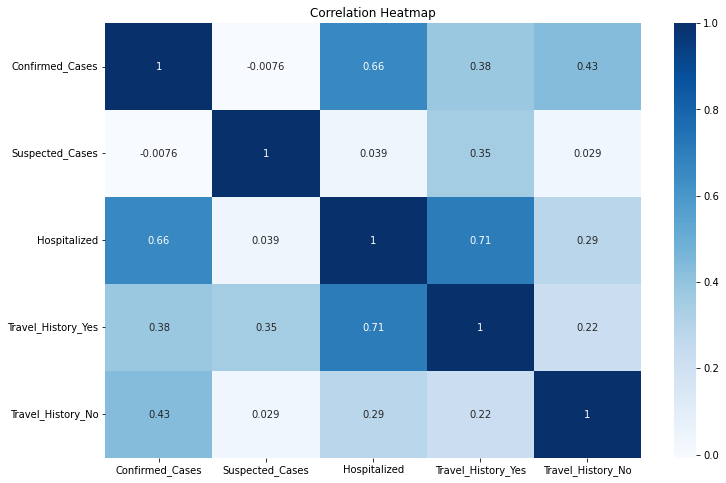

In [16]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(),annot=True,cmap='Blues');
plt.title('Correlation Heatmap');

<p style="color:#000066; font-size:16px;">We can see that People with Travel History have a positive correlation with the Hospitalization!!<br>
Also Hospitalized Cases have a positive correlation with the Confirmed Cases!!</p>

<a id='section-5.2'></a>
<h3 style="color:#ff1a75;">Scatterplot Distribution</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [17]:
def corr_scatter(col1=None,col2=None,dataframe=None):
    plt.figure(figsize=(12,8));
    sns.scatterplot(x=col1,y=col2,data=dataframe);
    xlabel = ' '.join(col1.split('_'))
    ylabel = ' '.join(col2.split('_'))
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(f'{xlabel} vs {ylabel}');
    plt.show();

In [18]:
columns = df.columns.drop(['Country'])

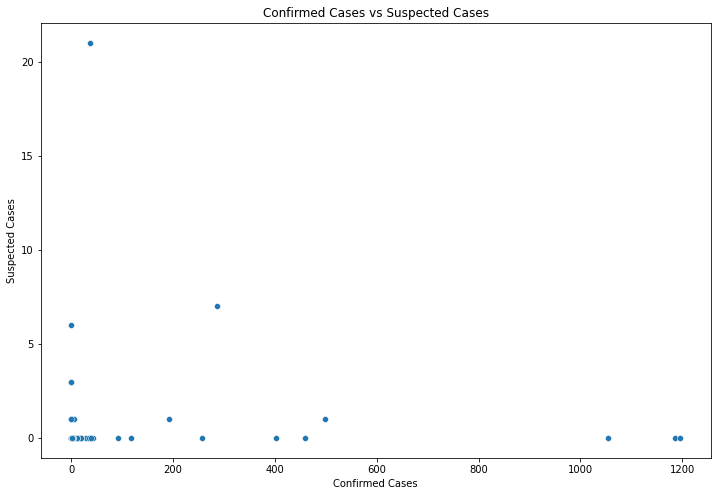

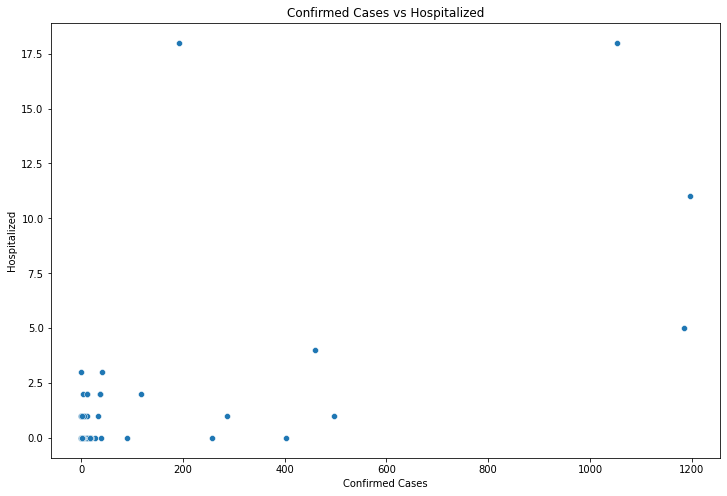

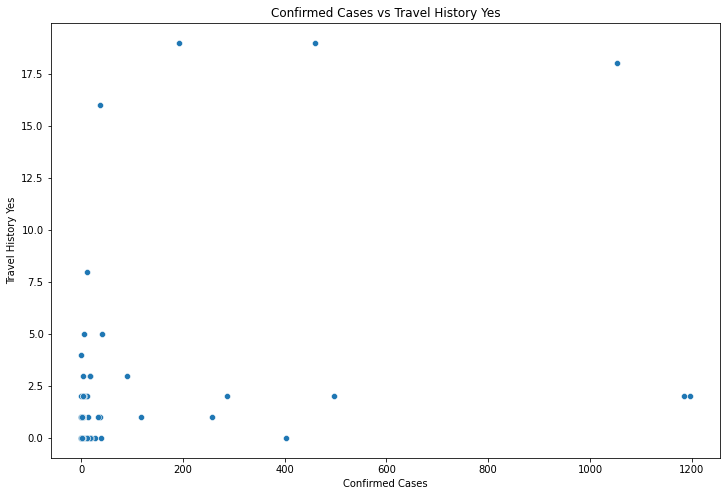

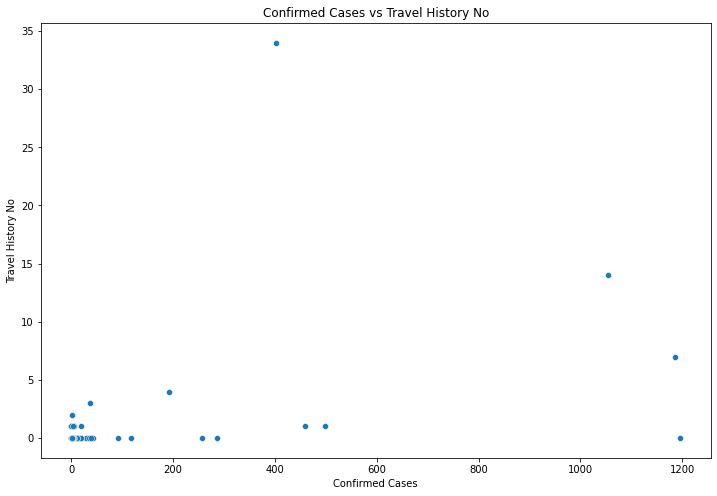

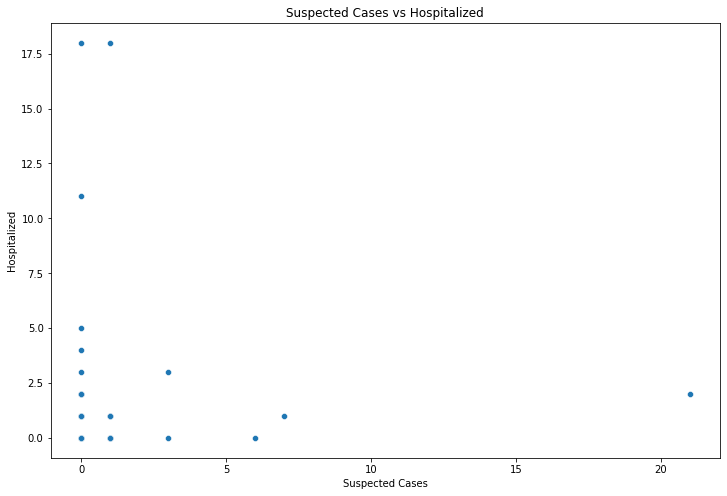

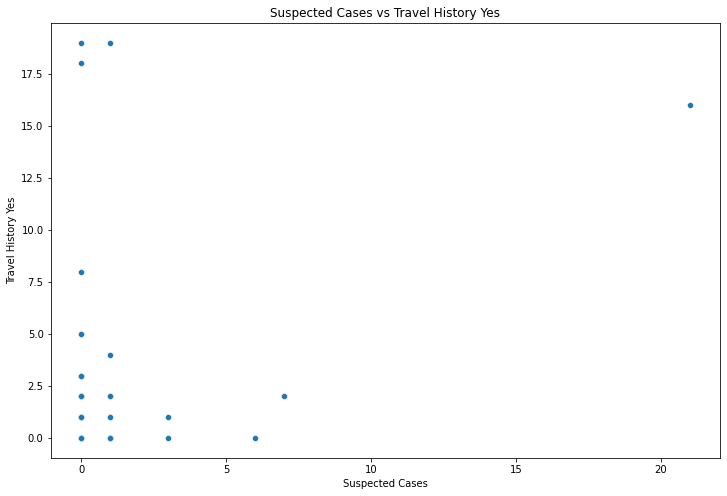

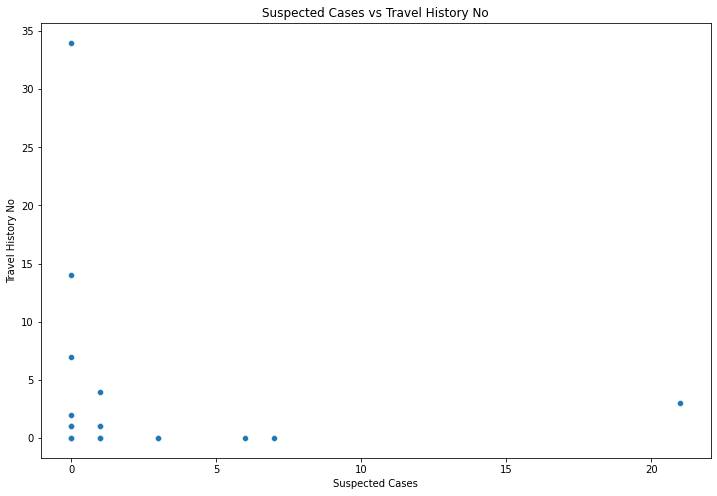

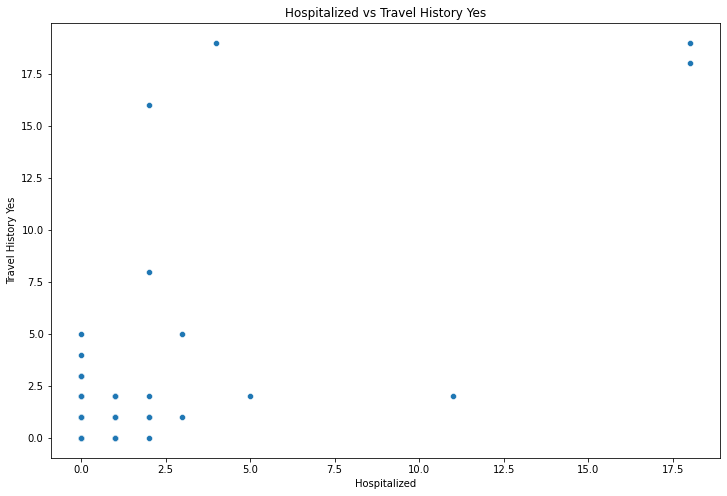

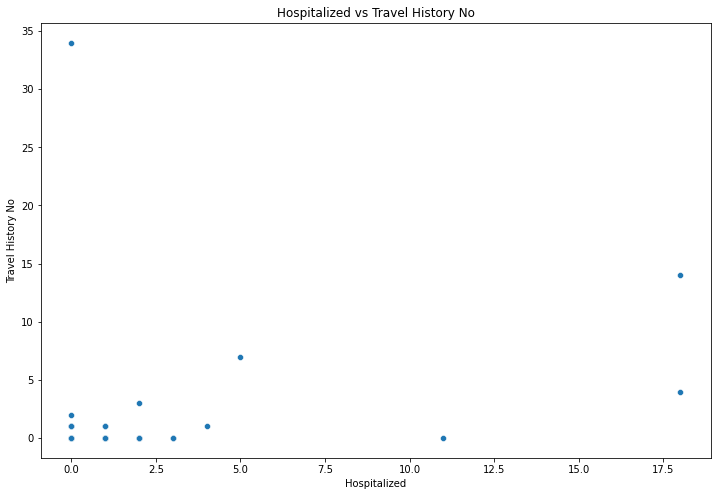

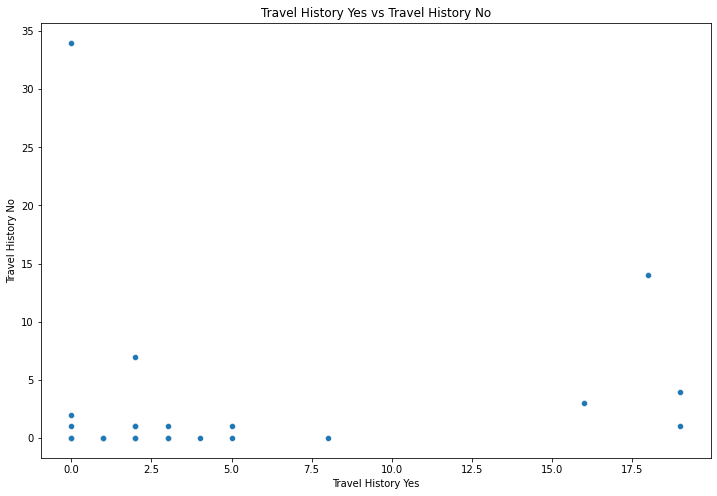

In [19]:
for col1 in columns:
    for col2 in columns.drop([col1]):
        corr_scatter(col1=col1,col2=col2,dataframe=df);
    columns = columns.drop([col1])

In [20]:
pair_df = df.drop(['Country'],axis=1)

<a id='section-5.3'></a>
<h3 style="color:#ff1a75;">PairPlot</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

<Figure size 1440x720 with 0 Axes>

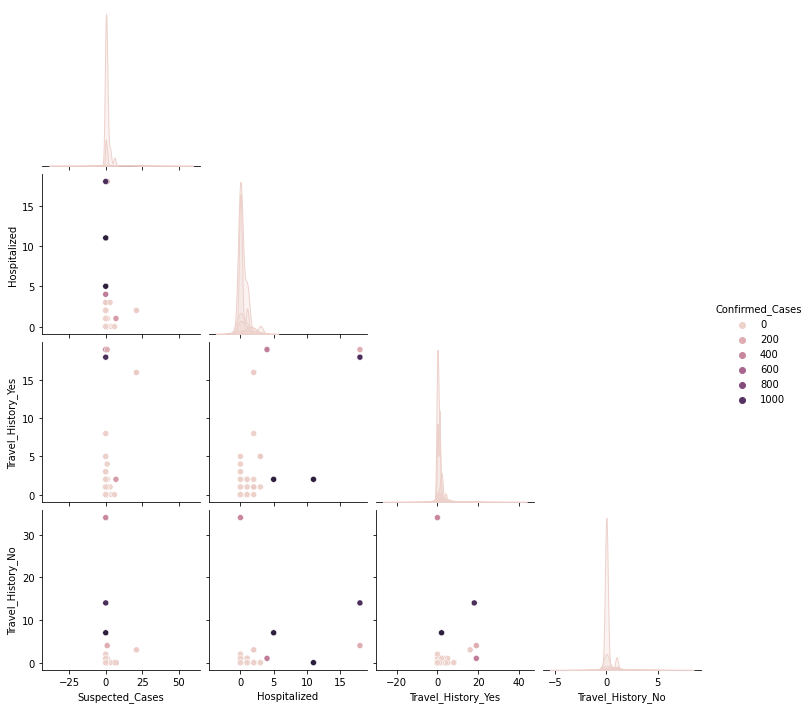

In [21]:
plt.figure(figsize=(20,10));
sns.pairplot(pair_df,corner=True,hue='Confirmed_Cases');

<a id='section-5.4'></a>
<h3 style="color:#ff1a75;">Outlier Detection</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

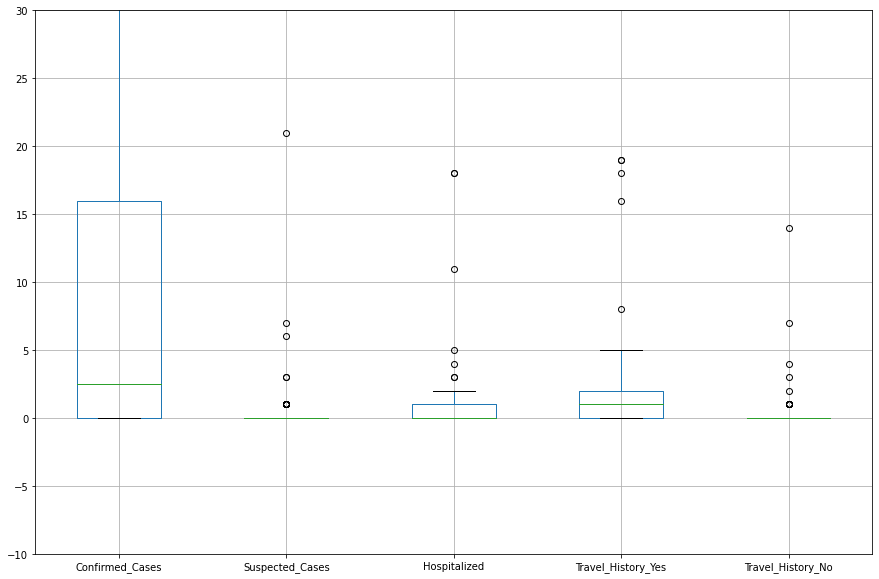

In [22]:
pair_df.boxplot(figsize=(15,10));
plt.ylim(-10,30);

<p style="color:#000066; font-size:16px;">Since most of our data is close to 0, we can see a lot of outliers. These outliers are not actually outliers but the small dataset makes it look so. Over time, the dataset will increase moving the 50% green line away from 0.</p>

In [23]:
columns = df.columns.drop(['Country'])

<a id='section-5.5'></a>
<h3 style="color:#ff1a75;">Distribution Curve</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

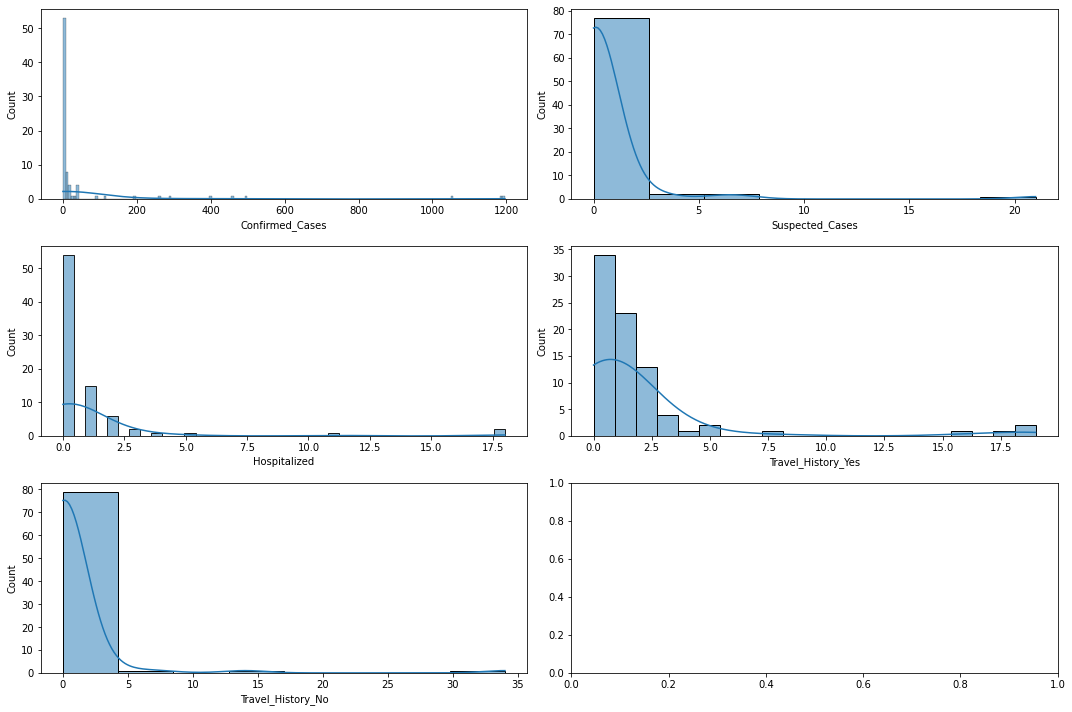

In [24]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
for name, ax in zip(columns, axes.flatten()):
    sns.histplot(x=name,kde=True, data=df, ax=ax)
    
plt.tight_layout()

<p style="color:#000066; font-size:16px;">All our columns are highly <b>right skewed</b> because of majority values being 0.<br>
Let's try normalizing the dataset before modelling!</p>

<a id='section-6'></a>
<h1 style="color:#ff1a75;">Normalization</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [25]:
X = df.drop(['Country','Confirmed_Cases'],axis=1)
y=df['Confirmed_Cases']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [27]:
scaler = preprocessing.StandardScaler()

In [28]:
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [29]:
normalized_x_train.head()

,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,-0.222752,-0.344423,-0.486482,-0.182599
1,-0.222752,-0.344423,-0.486482,-0.182599
2,-0.222752,-0.344423,0.297518,-0.182599
3,-0.222752,0.414475,1.604183,-0.182599
4,-0.222752,-0.344423,-0.486482,-0.182599


<a id='section-6.1'></a>
<h3 style="color:#ff1a75;">Before Vs After Scaling</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

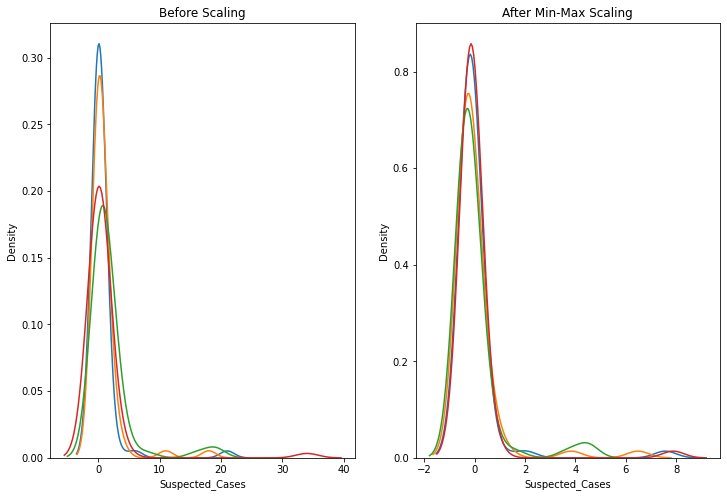

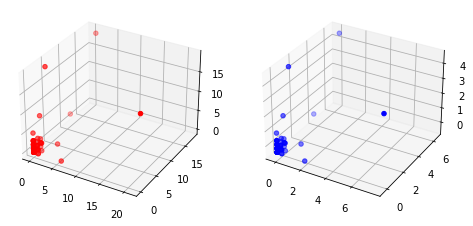

In [30]:
fig, (ob1, ob2) = plt.subplots(ncols=2,figsize=(12,8))
ob1.set_title('Before Scaling')
sns.kdeplot(X_train['Suspected_Cases'],ax=ob1)
sns.kdeplot(X_train['Hospitalized'],ax=ob1)
sns.kdeplot(X_train['Travel_History_Yes'],ax=ob1)
sns.kdeplot(X_train['Travel_History_No'],ax=ob1)

ob2.set_title('After Min-Max Scaling')
sns.kdeplot(normalized_x_train['Suspected_Cases'],ax=ob2)
sns.kdeplot(normalized_x_train['Hospitalized'],ax=ob2)
sns.kdeplot(normalized_x_train['Travel_History_Yes'],ax=ob2)
sns.kdeplot(normalized_x_train['Travel_History_No'],ax=ob2)
plt.show()

fig = plt.figure(figsize=(8,6))
ob3 = fig.add_subplot(121,projection='3d')
ob4 = fig.add_subplot(122,projection='3d')
ob3.scatter(X_train['Suspected_Cases'],X_train['Hospitalized'],X_train['Travel_History_Yes'],color='red')
ob4.scatter(normalized_x_train['Suspected_Cases'],normalized_x_train['Hospitalized'],normalized_x_train['Travel_History_Yes'],color='blue')
plt.show()

<p style="color:#000066; font-size:16px;">Too many 0's are present currently so we cannot use log transformation for changing distribution but we can see that scaling didn't do much change to our data!!</p>

In [31]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

<a id='section-7'></a>
<h1 style="color:#ff1a75;">Modelling</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

<p style="color:#000066; font-size:16px;">Functions made for calculating predictions and evaluating the model.<br>
To see the working of a function, in a new code cell type "help(function_name)" to see a summary of the function</p>

In [32]:
d={}
def metric_scores(actual,predicted,name):
    
    """
    Function To evaluate and store the evaluation metric scores .
    Arguments to be passed:
    1. y_test
    2. y_pred
    3. name of the model
    """
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    
    d[name]=[mae,mse,mape,r2]
    
    print('Mean Absolute Error is {:.3f}'.format(mae))
    print()
    print('Mean Squared Error is {:.3f}'.format(mse))
    print()
    print('Mean Absolute Percentage Error is {:.3f}'.format(mape))
    print()
    print('R Squared Error is {:.3f}'.format(r2))
    print()

In [33]:
def evaluate_model(x_test=None,y_test=None,model=None,name='Linear Regression'):
    
    """
    A function to make predictions, evaluate the model and plot the regression line!!!
    The function requires the following values:
    1. x_test
    2. y_test
    3. model object
    4. Name of the model 
    """
    
    predicted = model.predict(x_test)
    actual=y_test
    
    metric_scores(actual,predicted,name)
    plt.figure(figsize=(12,8))
    plt.scatter(actual, predicted, c='hotpink')

    p1 = max(max(predicted), max(actual))
    p2 = min(min(predicted), min(actual))
    plt.plot([p1, p2], [p1, p2],'#000066')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(name,fontsize=30)
    plt.axis('equal')
    plt.show()

<a id='section-7.1'></a>
<h3 style="color:#ff1a75;">Linear Regression</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(normalized_x_train,y_train)

LinearRegression()

Mean Absolute Error is 107.095

Mean Squared Error is 56873.519

Mean Absolute Percentage Error is 53620872702122296.000

R Squared Error is 0.559



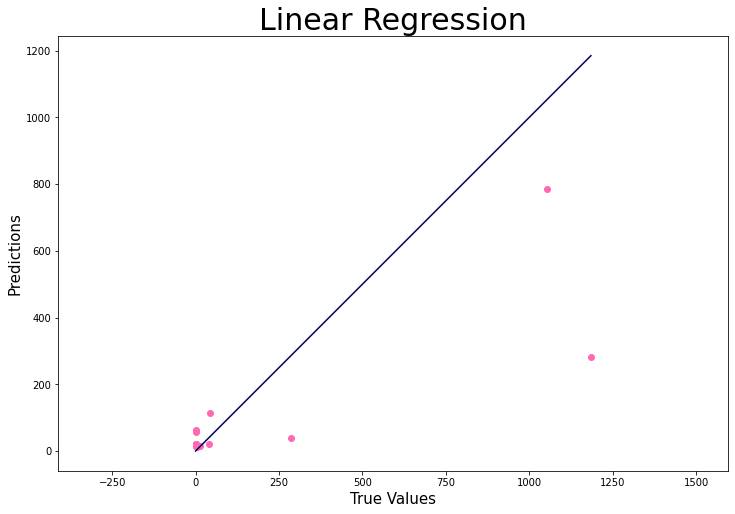

In [36]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=lr,name='Linear Regression')

<a id='section-7.2'></a>
<h3 style="color:#ff1a75;">Decision Tree Regressor</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [37]:
DR = DecisionTreeRegressor(random_state=42)

In [38]:
DR.fit(normalized_x_train, y_train)

DecisionTreeRegressor(random_state=42)

Mean Absolute Error is 121.715

Mean Squared Error is 79675.624

Mean Absolute Percentage Error is 3921819744711335.500

R Squared Error is 0.383



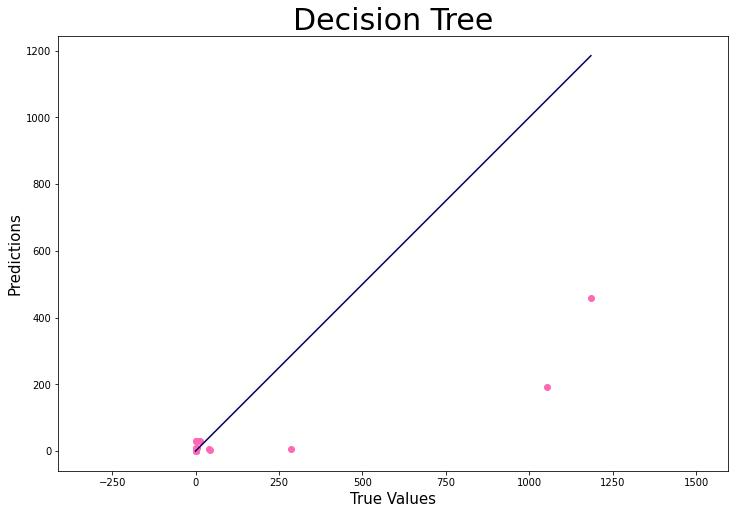

In [39]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=DR,name='Decision Tree')

<a id='section-7.3'></a>
<h3 style="color:#ff1a75;">Random Forest Regressor</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [40]:
model=RandomForestRegressor(n_estimators=100, verbose=4)

In [41]:
model.fit(normalized_x_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(verbose=4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


Mean Absolute Error is 107.573

Mean Squared Error is 59417.765

Mean Absolute Percentage Error is 4708566758591815.000

R Squared Error is 0.540



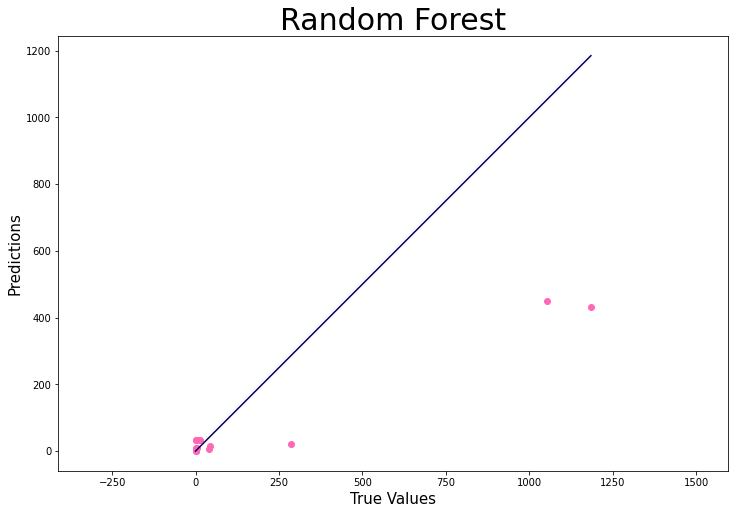

In [42]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=model,name='Random Forest')

<a id='section-7.4'></a>
<h3 style="color:#ff1a75;">Elastic Net Regressor</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [43]:
regr = ElasticNet()
regr.fit(normalized_x_train.values, y_train.values)

ElasticNet()

Mean Absolute Error is 128.747

Mean Squared Error is 77209.719

Mean Absolute Percentage Error is 52333647692352344.000

R Squared Error is 0.402



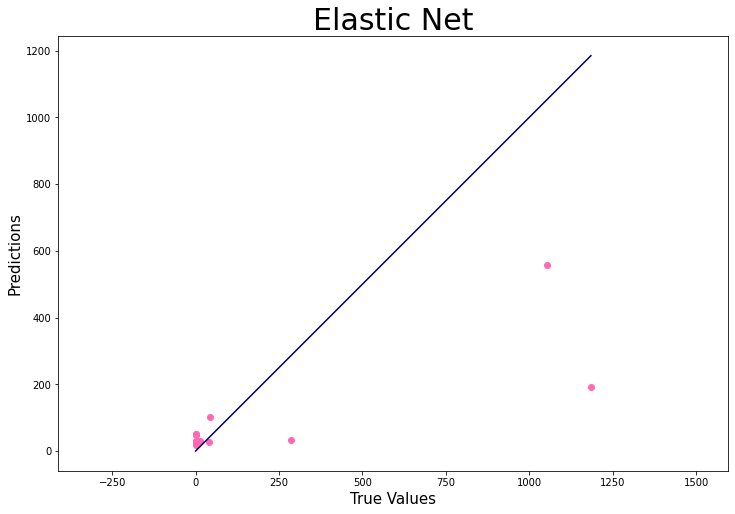

In [44]:
evaluate_model(x_test=normalized_x_test.values,y_test=y_test,model=regr,name='Elastic Net')

<a id='section-8'></a>
<h1 style="color:#ff1a75;">Results</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [45]:
results = pd.DataFrame(d,index = ['MAE','MSE','MAPE','R2'])

In [46]:
results

,Linear Regression,Decision Tree,Random Forest,Elastic Net
MAE,1.070950e+02,1.217148e+02,1.075728e+02,1.287475e+02
MSE,5.687352e+04,7.967562e+04,5.941777e+04,7.720972e+04
MAPE,5.362087e+16,3.921820e+15,4.708567e+15,5.233365e+16
R2,5.593442e-01,3.826735e-01,5.396313e-01,4.017793e-01


<p style="color:#000066; font-size:16px;">As of now, all our model results are bad but overtime hopefully this will improve as we get more data!!<br>R2 is the metric I will be using for model evaluation and based on the R2 Score, Decision Tree is our best model so far.</p>

<a id='section-99'></a>

---

<h1 style="color:#ff1a75; text-align:center;">Thank You</h1>

<h3 style="color:#ff66ff; text-align:center;">If you liked my work, do upvote it!!!</h3>

<div style="text-align:center;">
<img src="https://apollohealthlib.blob.core.windows.net/health-library/2022/05/Monkeypox.jpeg" width="600px">
</div>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

---